In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

from models import *

import numpy as np
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [3]:
cifar_train = datasets.CIFAR10('./data', train=True, download=True, transform=transforms.ToTensor())
cifar_test = datasets.CIFAR10('./data', train=False, download=True, transform=transforms.ToTensor())

train_loader = DataLoader(cifar_train, batch_size=128, shuffle=True, num_workers=2)
test_loader = DataLoader(cifar_test, batch_size=128, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img_tensor):
    img = torchvision.utils.make_grid(img_tensor)
    plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))
    plt.show

def show_labels(labels):
    print(' '.join('%5s' % classes[labels[j]] for j in range(labels.size()[0])))

Files already downloaded and verified
Files already downloaded and verified


horse truck   dog plane plane


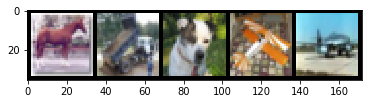

In [4]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(images[:5,:,:,:])
show_labels(labels[:5])

In [5]:
net = ResNet50()
#net = models.resnet50()
#net.fc = nn.Linear(net.fc.in_features, 10)
net.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (1): Bottleneck(
      (

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=1e-1, momentum=0.9, weight_decay=5e-4)

In [7]:
n_epoch = 350

for epoch in range(n_epoch):
    
    if epoch == 150:
        print('Change learning rate to 1e-2')
        optimizer = optim.SGD(net.parameters(), lr=1e-2, momentum=0.9, weight_decay=5e-4)
    elif epoch == 250:
        print('Change learning rate to 1e-3')
        optimizer = optim.SGD(net.parameters(), lr=1e-3, momentum=0.9, weight_decay=5e-4)
    
    running_loss = 0.0
    correct = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    print('[%d] loss: %.9f accuracy: %.3f' % (epoch + 1, running_loss / len(cifar_train), 100 * correct / len(cifar_train)))

print('Finished Training')

[1] loss: 0.020388257 accuracy: 19.940
[2] loss: 0.013354537 accuracy: 36.408
[3] loss: 0.011371213 accuracy: 46.518
[4] loss: 0.009751299 accuracy: 54.522
[5] loss: 0.008470003 accuracy: 60.956
[6] loss: 0.007331303 accuracy: 66.760
[7] loss: 0.006410208 accuracy: 70.872
[8] loss: 0.005620822 accuracy: 74.632
[9] loss: 0.004935654 accuracy: 77.886
[10] loss: 0.004488725 accuracy: 80.030
[11] loss: 0.004098917 accuracy: 81.802
[12] loss: 0.003829149 accuracy: 82.732
[13] loss: 0.003602761 accuracy: 83.996
[14] loss: 0.003427650 accuracy: 84.804
[15] loss: 0.003321059 accuracy: 85.286
[16] loss: 0.003149717 accuracy: 85.940
[17] loss: 0.003023063 accuracy: 86.618
[18] loss: 0.002936763 accuracy: 86.876
[19] loss: 0.002844889 accuracy: 87.194
[20] loss: 0.002731589 accuracy: 87.986
[21] loss: 0.002685753 accuracy: 88.086
[22] loss: 0.002603801 accuracy: 88.416
[23] loss: 0.002553293 accuracy: 88.684
[24] loss: 0.002486589 accuracy: 88.922
[25] loss: 0.002459131 accuracy: 89.116
[26] loss

  cat  ship  ship plane  frog


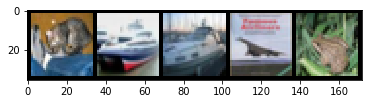

In [8]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

images = images.to(device)

net.eval()

imshow(images.cpu()[:5,:,:,:])
outputs = net(images)
_, predicted = torch.max(outputs.data, 1)
show_labels(predicted[:5])

In [9]:
net.eval()

correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).double().sum().item()
        
print(correct, total)
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

8934.0 10000
Accuracy of the network on the 10000 test images: 89 %


In [10]:
PATH = './resnet50_standard_training.pth'
torch.save(net.state_dict(), PATH)